# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science
libraries in an attemp to build a michine learning model capable of predicting
wether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

Given clinical parameters about a patient, can we predict wether or not they have 
heart disease?

## 2. Data

The original data came from Cleveland data from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/heart+Disease 
    
## 3. Evaluation

If we can reach 95 % accuracy at predicting wether or not a patient has heart disease
during the proof of conecpt, we'll pursue the project.

## 4. Features

Only 14 attributes used:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
pandas, matplotlib and numpy will be used for data analysis and manipulation.


In [3]:
#Importing tools

#Regular EDa (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Make plots appear inside the notebook
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis EDA)

The goal here is to find out more about the data and become a subject matter
expert on the dataset you're working with.

Checklist:
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from te data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [8]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# How many of each class there is in 'target'
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

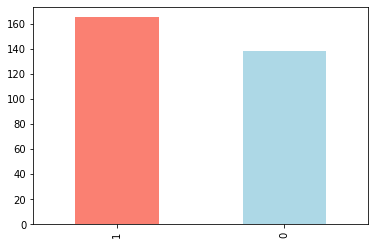

In [11]:
#visualise the count
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
#General info
#303 samples, 14 columns, all numerical
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#Do we have NaN in the samples?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
#Numerical information
#Mean value of age is 54
#More male samples than female
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [18]:
#Gender destribution
df.sex.value_counts() 

1    207
0     96
Name: sex, dtype: int64

In [17]:
#Compare sex column to target column
#Male have the least positive targets
#Female have the most positive targets

#By looking at the data, we can see that:
# (72 / 96) * 100 = 75 % of female samples have heart disease
# (24 / 96) * 100 = 25 % of female samples do not have heart disease
# (93 / 207) * 100 = 45 % of male samples have heart disease
# (114 / 207) * 100 = 55 % of male samples do not have heart disease

#So, based on this data, we can assume that if we have a female sample,
#75% risk she will have heart disease, while for a male target, there's
#roughly 50% risk he will have heart disease

#

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


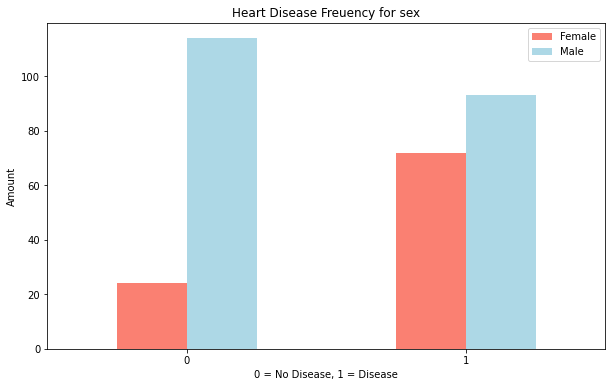

In [25]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"]);

plt.title("Heart Disease Freuency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Heart Disease Frequency according to maximum heart rate achieved

In [28]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

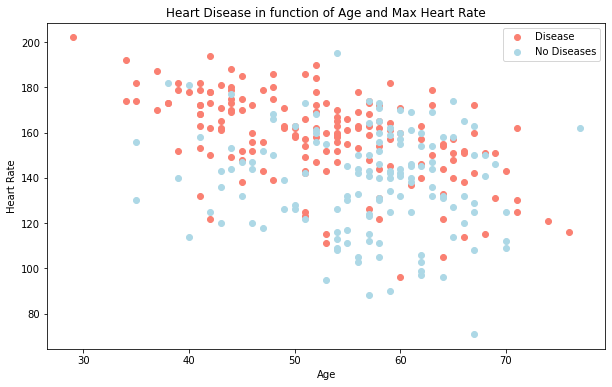

In [41]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");
plt.xlabel("Age")
plt.ylabel("Heart Rate")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");
plt.xlabel("Age")
plt.ylabel("Heart Rate");
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.legend(["Disease","No Diseases"]);

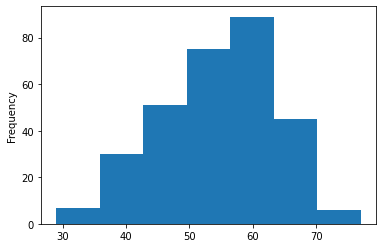

In [51]:
#Check the distribution of the age column with a historgram
df.age.plot.hist(bins=7);

### Heart Disease Frequency
cp - chest pain type
0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [54]:
#cp type 3 'not showing sign of disease', yet in this dataset, samples with
#cp type 3 have the most cases of target=1. How does this make sense?
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


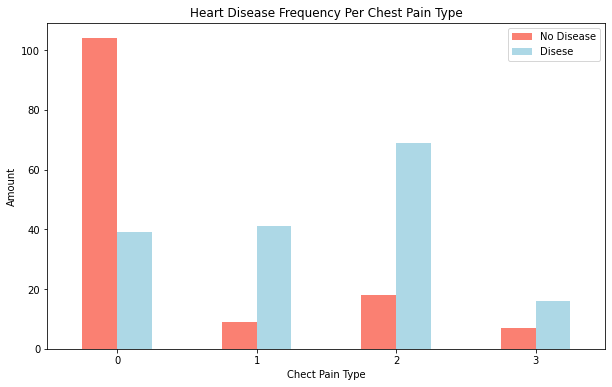

In [58]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"]);

#Add communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chect Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disese"])
plt.xticks(rotation=0);

In [59]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


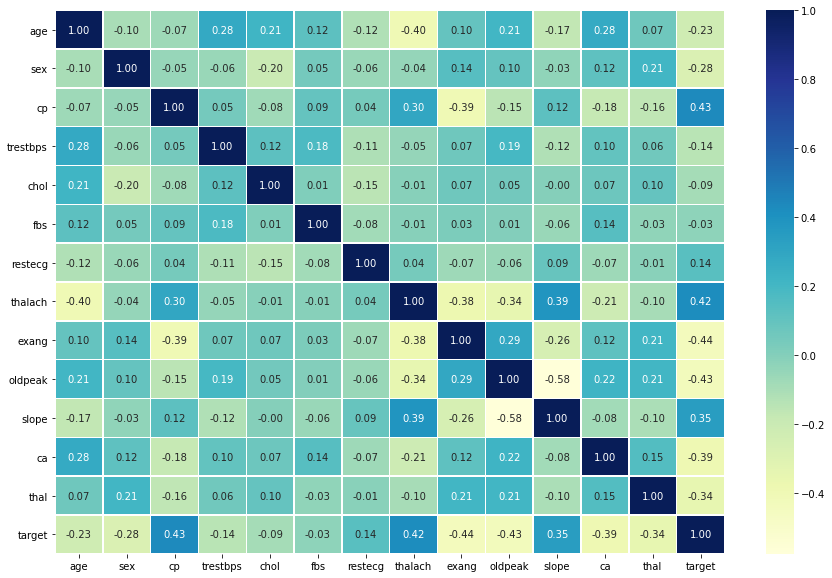

In [62]:
#Make correlation matrix visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

#Higher positiv value = higher positive correlation (meaning target will be higher) 
#Higher negative value = higher negative correlation (meaning target will be lower) 

# 5. Modelling

In [63]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Preparing data

In [64]:
#Split data into X and y

X = df.drop("target",axis=1)
y = df["target"] 

In [67]:
#Check X
X[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [68]:
#Check y
y[:5] 

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [86]:
#Create seed so we can replicate results
np.random.seed(40) 

#Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Now we've got our data split into training and test sets. It's time to
create a machine learning model. We'll train it on the training set (find patterns)
and test it on the test set (use learned patterns)

We'll be trying three different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [89]:
#Put models in a dictonary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}
#Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : training labels
    """
    
    #Set random seed
   
    #Make dictonary to keep model scores
    model_score = {}
    
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        
        #Evaluate models
        model_score[name] = model.score(X_train, y_train)
    
    #Return dict with scores
    return model_score

In [90]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test) 

C:\Users\Nichlas\learning_machine_learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
model_scores
#Something is up with Random Forest

{'Logistic Regression': 0.8553719008264463,
 'KNN': 0.7603305785123967,
 'Random Forest': 1.0}

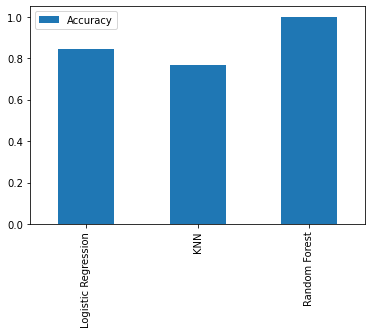

In [95]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model and we know model's first predictions aren't
altways what we should base our next steps off. So what now?

Let's look at the following (two first are common for all models we are
working on. Last nine are specific for classification):
* Hyperparameter tuning
* Feature importance
* specific to classification:
* Confusion matrix
* Cross-validation
* precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

### Tuning KNN (by hand)

In [122]:
train_scores = []
test_scores = [] 

#Create a list of different values
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop though different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [115]:
train_scores

[1.0,
 0.7975206611570248,
 0.7892561983471075,
 0.7768595041322314,
 0.768595041322314,
 0.7603305785123967,
 0.7396694214876033,
 0.7148760330578512,
 0.7024793388429752,
 0.7024793388429752,
 0.7148760330578512,
 0.6983471074380165,
 0.7024793388429752,
 0.7024793388429752,
 0.6900826446280992,
 0.7148760330578512,
 0.7148760330578512,
 0.71900826446281,
 0.7148760330578512,
 0.7107438016528925]

In [116]:
test_scores

[0.6229508196721312,
 0.5901639344262295,
 0.7049180327868853,
 0.5737704918032787,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6885245901639344,
 0.6885245901639344]

Maximum KNN score on the test data: 70.49%


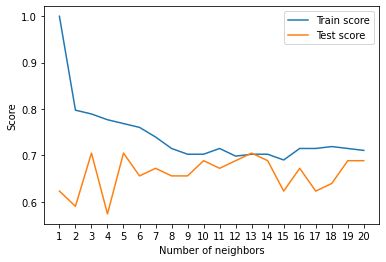

In [121]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1)) #organiserer x-aksen>
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV
Our LogisticRegression() and RandomForestClassifier() will be tuned with
RandomizedSearchCV

In [125]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

In [130]:
#Tune LogisticRegression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameer search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [131]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [132]:
rs_log_reg.score(X_test, y_test) 

0.9016393442622951

LogisticRegression has now been tuned. Same will be done with
RandomForestClassifier()

In [133]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=2) 

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.8s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.7s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.8s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.1s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5, total=   0.6s
[CV] n_estimators=310, min_samples_split=2,

[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.6s
[CV] n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.6s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.6s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.6s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.7s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.7s
[CV] n_estimators=910, min_samples_split=18,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [134]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [135]:
rs_rf.score(X_test, y_test) 

0.8852459016393442

In [136]:
models

{'Logistic Regression': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier()}

In [139]:
models["Random Forest"].score(X_test, y_test)

0.8032786885245902

## Hyperparameter tuning with GridSearchCV

LinearRegression is doing better than both KNearestNeighbors and 
RandomForestClassifier. Therefore we will be focusing on that.

We will now try, to further improve our LinearRegression model, by using
GridSearchCV and therefore exhausting the list of hyperparameter values.

In [143]:
#Different hyperparameters for our LogisticRegression model:
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

#Setup grid for hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#Fit the model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [145]:
#Best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [146]:
#Check GridSearchCV score
gs_log_reg.score(X_train, y_train)

0.8429752066115702

In [149]:
#RandomizedSearchCV score
rs_log_reg.score(X_train, y_train)

0.8471074380165289

In [150]:
#Baseline model score
model_score["Logistic Regression"]

0.8553719008264463

## Evaluating our tuned machine learning classifier beyond accuracy:
* ROC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

(I will use cross-validation where possible)

In [152]:
    #Make predictions we can compare to the truth
    
    y_preds = gs_log_reg.predict(X_test) 
    y_preds

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

#### ROC Curve

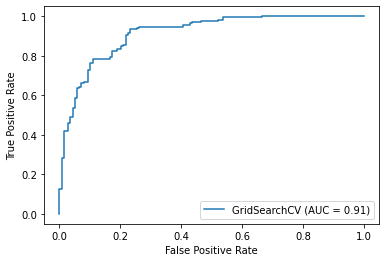

In [154]:
#Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X, y);

#### Confucion matrix

In [155]:
#Confusion matrix
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 1, 34]], dtype=int64)

In [166]:
#Function to visuale confusion matrix
def plot_conf_mat(y_test, y_preds):
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3,3))
    ax = conf_matrix = sns.heatmap(confusion_matrix(y_test,y_preds),
                                   annot=True,
                                   cbar=False)

    plt.xlabel("True label")
    plt.ylabel("Predicted label")

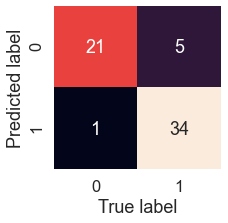

In [167]:
#Use the function
plot_conf_mat(y_test, y_preds) 

#### Classification report

In [169]:
#Classification report on one training and test set
print(classification_report(y_test, y_preds)) 

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



In [174]:
#Check the best hyperparameters for our model
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [177]:
#Create new model with these hyperparameters
clf = LogisticRegression(C=0.1082636733874054,
                         solver="liblinear")

In [187]:
#Cross-validated accuracy
np.random.seed(42)
cv_accuracy = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="accuracy")
cv_accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [189]:
#Mean accuracy
np.mean(cv_accuracy) 

0.834808743169399

In [190]:
#Cross-validated precision
np.random.seed(42)
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.84848485, 0.85714286, 0.725     ])

In [192]:
#Mean precision
np.mean(cv_precision) 

0.8182683982683983

In [193]:
#Cross-validated recall
np.random.seed(42)
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.84848485, 0.90909091, 0.87878788])

In [194]:
#Mean recall
np.mean(cv_recall) 

0.9030303030303031

In [195]:
#Cross-validated f1-score
np.random.seed(42) 
cv_f1 = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.84848485, 0.88235294, 0.79452055])

In [196]:
#Mean f1-score
np.mean(cv_f1) 

0.8572876223964057

In [202]:
#Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : np.mean(cv_accuracy),
                           "Precision" : np.mean(cv_precision),
                           "Recall" : np.mean(cv_recall),
                           "F1-score" : np.mean(cv_f1)},
                          index=[0]) 
cv_metrics

,Accuracy,Precision,Recall,F1-score
0,0.834809,0.818268,0.90303,0.857288


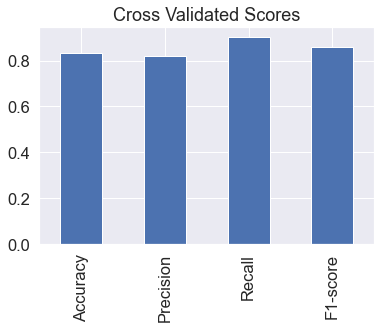

In [211]:
cv_metrics.T.plot.bar(title="Cross Validated Scores",
                      legend=False);

### Feature importance

NOTE: Feature importance is another way of asking: "which features contributed most to the outcome
of the model, and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for this LogisticRegression model.

In [212]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [228]:
#Fit an instance of Logistic Regression with best hyperparameters
clf = LogisticRegression(C=0.1082636733874054,
                         solver="liblinear") 
clf.fit(X_train, y_train);

In [229]:
#Check coef_
#coef_ show how much and in what way each feature contribues to reaching the target variable

clf.coef_

array([[ 0.00567294, -0.60072207,  0.66980091, -0.02126791, -0.00160921,
        -0.06916533,  0.27208603,  0.02893199, -0.3358502 , -0.40005284,
         0.23081045, -0.54819608, -0.50523544]])

In [230]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.005672937176437692,
 'sex': -0.6007220710223918,
 'cp': 0.6698009065340124,
 'trestbps': -0.021267914666884793,
 'chol': -0.0016092124567817325,
 'fbs': -0.06916533178477538,
 'restecg': 0.2720860347676928,
 'thalach': 0.028931992803860107,
 'exang': -0.33585020298888596,
 'oldpeak': -0.4000528399236361,
 'slope': 0.23081045395072708,
 'ca': -0.5481960807091656,
 'thal': -0.50523543506469}

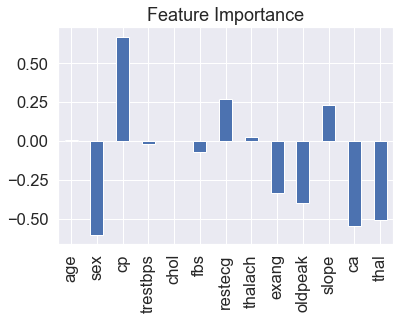

In [232]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

coef_ show how much and in what way each feature contribues to reaching the target variable

How to translate the graph above:
sex: It's strongly negative. That means it has a negative correlation to the target variable. In other 
    words: When the value or 'sex' increases, the target value decreases because of the negative 
    correlation

In [233]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


So as the sex increases, the target decreases (look at the last row. Sex has the value of 1)
But as the sex decreases, the target increases (look at the first row. Sex has the value of 0)

In [235]:
pd.crosstab(df["slope"], df["target"]) 

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope has a positive correlation. So as it increases, the target should also increase
slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

So as the slope increases (can have the value 0, 1 or 2), the samples with heart disease should increase
(based on the data that is)

# Conclusion

We did not reach the 95% accuracy, but we did get very close!
How can we keep going?

1. Could we collect more data?
2. Coul we try a better model? Like CatBoost or XGBoost?
3. Could we improve on the current models? (beyond what we've done so far)